In [ ]:
import numpy as np
from scipy.stats import pearsonr
import pandas as pd
import matplotlib.pyplot as plt
from math import isnan
import operator
!pip install --upgrade plotly

from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
print("HELLLOooooooooo")

HELLLOooooooooo


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dataset

In [ ]:
df_movies = pd.read_csv("/content/drive/MyDrive/ML/IMDb movies.csv")
df_movies.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [ ]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

In [ ]:
df_movies.describe()

,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics
count,85855.000000,85855.000000,8.585500e+04,13305.000000,78258.000000,74058.000000
mean,100.351418,5.898656,9.493490e+03,55.896881,46.040826,27.479989
std,22.553848,1.234987,5.357436e+04,17.784874,178.511411,58.339158
min,41.000000,1.000000,9.900000e+01,1.000000,1.000000,1.000000
25%,88.000000,5.200000,2.050000e+02,43.000000,4.000000,3.000000
50%,96.000000,6.100000,4.840000e+02,57.000000,9.000000,8.000000
75%,108.000000,6.800000,1.766500e+03,69.000000,27.000000,23.000000
max,808.000000,9.900000,2.278845e+06,100.000000,10472.000000,999.000000


In [ ]:
df_movies.isnull().sum()

imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                     64
language                   833
director                    87
writer                    1572
production_company        4455
actors                      69
description               2115
avg_vote                     0
votes                        0
budget                   62145
usa_gross_income         70529
worlwide_gross_income    54839
metascore                72550
reviews_from_users        7597
reviews_from_critics     11797
dtype: int64

In [ ]:
df_movies=df_movies.drop(['date_published','description','budget','usa_gross_income','worlwide_gross_income','metascore','writer','production_company'],axis=1)

In [ ]:
for i in range(len(df_movies['year'])):
  if(type(df_movies['year'][i])==type('abc')):
    try:
      x=int(df_movies['year'][i])
      df_movies['year'][i]=x

    except ValueError:
      df_movies['year'][i]=None
      print("Cannot convert to string")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Cannot convert to string


Outlier Detection

In [ ]:
# outlier detection

print(len(df_movies))
for i in range(100):
  if(df_movies['year'][i] < 1960 and ((df_movies['language'][i]=='None') or pd.isna(df_movies['language'][i]))):
    df_movies['language'][i] = 'Silent'

df_movies.head()


85855


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,imdb_title_id,title,original_title,year,genre,duration,country,language,director,actors,avg_vote,votes,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,Romance,45,USA,Silent,Alexander Black,"Blanche Bayliss, William Courtenay, Chauncey D...",5.9,154,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",70,Australia,Silent,Charles Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",6.1,589,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,Drama,53,"Germany, Denmark",Silent,Urban Gad,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",5.8,188,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,"Drama, History",100,USA,English,Charles L. Gaskill,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",5.2,446,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan","Salvatore Papa, Arturo Pirovano, Giuseppe de L...",7.0,2237,31.0,14.0


In [ ]:
df_movies.isnull().sum()

imdb_title_id               0
title                       0
original_title              0
year                        1
genre                       0
duration                    0
country                    64
language                  820
director                   87
actors                     69
avg_vote                    0
votes                       0
reviews_from_users       7597
reviews_from_critics    11797
dtype: int64

In [ ]:
df_movies=df_movies.dropna(how='any',axis=0) 

In [ ]:
df_movies.head()

,imdb_title_id,title,original_title,year,genre,duration,country,language,director,actors,avg_vote,votes,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,Romance,45,USA,Silent,Alexander Black,"Blanche Bayliss, William Courtenay, Chauncey D...",5.9,154,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",70,Australia,Silent,Charles Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",6.1,589,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,Drama,53,"Germany, Denmark",Silent,Urban Gad,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",5.8,188,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,"Drama, History",100,USA,English,Charles L. Gaskill,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",5.2,446,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan","Salvatore Papa, Arturo Pirovano, Giuseppe de L...",7.0,2237,31.0,14.0


In [ ]:
print(len(df_movies))

69233


In [ ]:
df_movies.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'genre', 'duration',
       'country', 'language', 'director', 'actors', 'avg_vote', 'votes',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

In [ ]:
df_ratings = pd.read_csv("/content/drive/MyDrive/ML/IMDb ratings.csv")
df_ratings.head()

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1,allgenders_0age_avg_vote,allgenders_0age_votes,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_0age_avg_vote,males_0age_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_0age_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,28,9,1,5,14,7.2,4.0,6.0,38.0,5.7,50.0,6.6,35.0,6.2,97.0,7.0,1.0,5.9,24.0,5.6,36.0,6.7,31.0,6.0,35.0,7.3,3.0,5.9,14.0,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,103,28,20,13,16,6.0,1.0,6.1,114.0,6.0,239.0,6.3,115.0,6.1,425.0,6.0,1.0,6.2,102.0,6.0,210.0,6.2,100.0,6.2,50.0,NaN,NaN,5.9,12.0,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,5.8,188,6.0,6.0,6,6,17,44,52,32,16,5,6,4,NaN,NaN,5.5,25.0,5.8,72.0,6.2,62.0,5.9,146.0,NaN,NaN,5.5,21.0,5.9,67.0,6.2,55.0,5.7,15.0,NaN,NaN,5.8,4.0,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,5.2,446,5.3,5.0,15,8,16,62,98,117,63,26,25,16,NaN,NaN,5.3,23.0,5.0,111.0,5.3,193.0,5.1,299.0,NaN,NaN,5.2,20.0,4.9,96.0,5.2,171.0,5.9,39.0,NaN,NaN,5.7,3.0,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,7.0,2237,6.9,7.0,210,225,436,641,344,169,66,39,20,87,7.5,4.0,7.0,402.0,7.0,895.0,7.1,482.0,7.0,1607.0,8.0,2.0,7.0,346.0,7.0,804.0,7.0,396.0,7.2,215.0,7.0,2.0,7.0,52.0,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0


In [ ]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   imdb_title_id              85855 non-null  object 
 1   weighted_average_vote      85855 non-null  float64
 2   total_votes                85855 non-null  int64  
 3   mean_vote                  85855 non-null  float64
 4   median_vote                85855 non-null  float64
 5   votes_10                   85855 non-null  int64  
 6   votes_9                    85855 non-null  int64  
 7   votes_8                    85855 non-null  int64  
 8   votes_7                    85855 non-null  int64  
 9   votes_6                    85855 non-null  int64  
 10  votes_5                    85855 non-null  int64  
 11  votes_4                    85855 non-null  int64  
 12  votes_3                    85855 non-null  int64  
 13  votes_2                    85855 non-null  int

In [ ]:
df_ratings.describe()

,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1,allgenders_0age_avg_vote,allgenders_0age_votes,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_0age_avg_vote,males_0age_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_0age_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
count,85855.000000,8.585500e+04,85855.000000,85855.000000,8.585500e+04,85855.000000,85855.000000,85855.000000,85855.000000,85855.000000,85855.000000,85855.000000,85855.000000,85855.000000,33359.000000,33359.000000,85149.000000,85149.000000,85845.000000,85845.000000,85775.000000,85775.000000,85854.000000,8.585400e+04,27411.000000,27411.000000,84390.000000,84390.000000,85843.000000,85843.000000,85754.000000,85754.000000,85774.000000,85774.000000,22117.000000,22117.000000,79334.000000,79334.000000,84911.000000,84911.000000,83057.000000,83057.000000,85176.000000,85176.000000,85646.000000,85646.000000,85854.000000,85854.000000
mean,5.898656,9.493490e+03,6.226342,6.267853,1.216158e+03,1196.774608,2040.896337,2105.668371,1353.192802,700.291177,340.179628,192.263409,126.663852,221.401479,6.195135,15.108097,6.011314,1778.370809,5.862917,4053.927124,5.678195,1260.706803,5.817172,6.029016e+03,6.221407,12.436978,5.946389,1343.226970,5.817767,3324.669338,5.630150,1051.196877,6.039408,1366.759461,6.147308,4.842881,6.321509,445.072340,6.071223,685.655451,6.022226,196.065341,5.155706,76.110231,5.925910,1647.822537,5.749638,4332.940865
std,1.234987,5.357436e+04,1.155280,1.481168,1.245582e+04,11735.363316,13801.122865,10699.375191,5976.801303,2931.301270,1415.815848,814.505546,551.690563,1172.132946,1.849155,74.016475,1.439783,11798.156167,1.279443,22087.819201,1.250633,5363.599259,1.248058,3.364652e+04,1.767590,56.672675,1.464165,9119.273345,1.289268,18348.499984,1.264053,4473.652738,1.346245,7672.675428,1.878342,16.045455,1.738922,2830.024831,1.454370,3732.376186,1.541895,842.979585,1.290920,124.264020,1.308087,8455.978158,1.285570,23243.807279
min,1.000000,9.900000e+01,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.200000,2.050000e+02,5.600000,6.000000,2.100000e+01,8.000000,18.000000,28.000000,30.000000,22.000000,12.000000,7.000000,5.000000,10.000000,5.000000,1.000000,5.300000,13.000000,5.100000,69.000000,5.000000,53.000000,5.100000,1.320000e+02,5.000000,1.000000,5.100000,9.000000,5.100000,56.000000,4.900000,45.000000,5.300000,22.000000,5.000000,1.000000,5.500000,4.000000,5.300000,10.000000,5.200000,6.000000,4.400000,11.000000,5.200000,24.000000,5.000000,95.000000
50%,6.100000,4.840000e+02,6.400000,6.000000,5.100000e+01,24.000000,49.000000,77.000000,76.000000,53.000000,30.000000,19.000000,14.000000,25.000000,6.000000,2.000000,6.200000,43.000000,6.100000,172.000000,5.900000,123.000000,6.000000,3.080000e+02,6.000000,1.000000,6.200000,31.000000,6.000000,140.000000,5.900000,104.000000,6.300000,58.000000,6.000000,1.000000,6.500000,11.000000,6.300000,27.000000,6.200000,16.000000,5.300000,29.000000,6.100000,81.000000,6.000000,225.000000
75%,6.800000,1.766500e+03,7.000000,7.000000,1.920000e+02,111.500000,234.000000,342.000000,290

In [ ]:
unique_col = df_movies.columns
unique_col

Index(['imdb_title_id', 'title', 'original_title', 'year', 'genre', 'duration',
       'country', 'language', 'director', 'actors', 'avg_vote', 'votes',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

Exploratory Data Analyis

Countries With Most Content

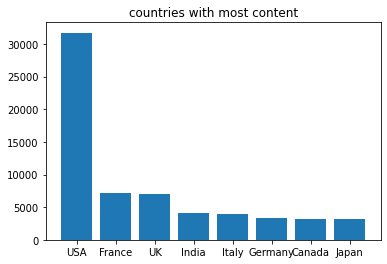

In [ ]:
temp = {}
for i in df_movies['country']:
  if(str(i) == 'nan'): continue
  all_countries = list(map(str,i.split(',')))

  for j in all_countries:
    j = j.strip()
    if(j in temp): temp[j] += 1
    else: temp[j] = 1

top_8 = dict(sorted(temp.items(), key=operator.itemgetter(1), reverse=True)[:8])
plt.bar(*zip(*top_8.items()))
plt.title('countries with most content')
plt.show()

Most Rated Movies

In [ ]:
import plotly.express as px

movies = []
rating = []
country = []
votecount = []

for i in df_movies['original_title']:
  movies.append(i)

for i in df_movies['avg_vote']:
  rating.append(float(i))

for i in df_movies['country']:
  country.append(i)

for i in df_movies['reviews_from_users']:
  votecount.append(i)

temp = []
for i in range(len(movies)):
  if(votecount[i] > 30):
    temp.append([rating[i],movies[i],country[i]])

temp.sort()
temp = temp[::-1]


movies = []
rating = []
country = []

for i in range(8):
  movies.append(temp[i][1])
  rating.append(temp[i][0])
  country.append(temp[i][2])

df_now = pd.DataFrame(list(zip(movies, rating, country)),
               columns =['movies', 'rating', 'country'])

fig =px.sunburst(
    df_now,
    path=['movies','country'],
    values='rating',
    color='rating',
    title = 'Most Rated Movies and their Corresponding Countries'
    )
fig.show()

All Genre

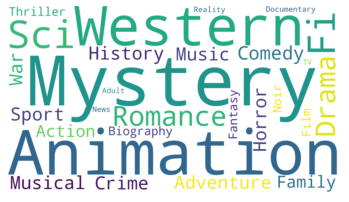

In [ ]:
text = set()

for i in df_movies['genre']:
  all = list(map(str,i.split(',')))
  for j in range(len(all)):
    all[j].strip()
  
  for j in all: text.add(j)

string = ''
for i in text:
  string += i + " "

wc = WordCloud(background_color = 'white', width = 1920, height = 1080)
wc.generate_from_text(string)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

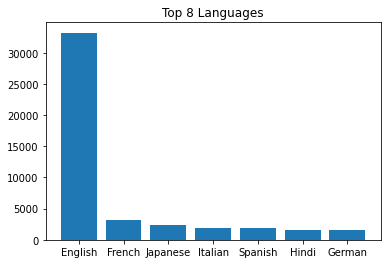

In [ ]:
temp = {}
for i in df_movies['language']:
  if(i not in temp): temp[i] = 1
  else: temp[i] += 1

top_8 = dict(sorted(temp.items(), key=operator.itemgetter(1), reverse=True)[:7])
plt.bar(*zip(*top_8.items()))
plt.title('Top 8 Languages')
plt.show()

year wise content

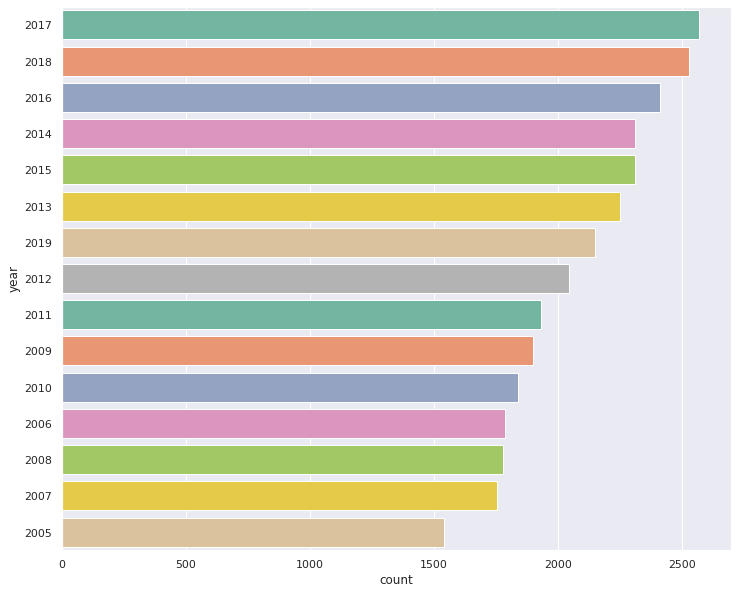

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="year", data=df_movies, palette="Set2", order=df_movies['year'].value_counts().index[0:15])

Most number of Votes

{'The Shawshank Redemption': 2278845, 'The Dark Knight': 2241615, 'Inception': 2002816, 'Fight Club': 1807440, 'Pulp Fiction': 1780147}


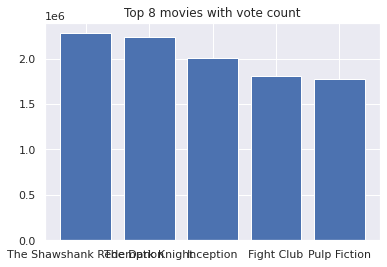

In [ ]:
id = []
name = []

for i in df_movies['original_title']:
  name.append(i)

for i in df_movies['imdb_title_id']:
  id.append(i)

map = {}
for i in range(len(id)):
  map[id[i]] = name[i]

temp = {}

id = []
votes = []
for i in df_ratings['total_votes']:
  votes.append(i)

for i in df_ratings['imdb_title_id']:
  id.append(i)

temp = {}
cnt = 0
for i in id:
  if(i not in map): 
    cnt+=1
    continue
  
  temp[map[i]] = votes[cnt]
  cnt+=1

top_8 = dict(sorted(temp.items(), key=operator.itemgetter(1), reverse=True)[:5])
print(top_8)
plt.bar(*zip(*top_8.items()))
plt.title('Top 8 movies with vote count')
plt.show()

In [ ]:
ids = []
votes = []

for i in df_ratings['imdb_title_id']: ids.append(i)

for j in range(1,11):
  template = 'votes_' + str(j)
  temp = []
  for i in df_ratings[template]:
    temp.append(i)
  votes.append(temp)

id_to_name = {}
moveid = []
name = []

for i in df_movies['imdb_title_id']: moveid.append(i)
for i in df_movies['original_title']: name.append(i)

for i in range(len(name)):
  id_to_name[moveid[i]] = name[i]

movie_votes = {}
for i in range(len(ids)):
  if(ids[i] not in id_to_name): continue
  v = [0]*10
  for j in range(10):
    v[j] += votes[j][i]

  v = v[::-1]

  movie_votes[id_to_name[ids[i]]] = v

top_5 = dict(sorted(movie_votes.items(), key=operator.itemgetter(1), reverse=True)[:5])

top5movies = []
final = {}
for i in top_5:
  top5movies.append(i)
  temp = top_5[i]
  temp = temp[::-1]
  d = {}
  for j in range(10): d[str(j + 1)] = temp[j]
  final[i] = d

print(final)

{'The Shawshank Redemption': {'1': 34158, '2': 4303, '3': 4615, '4': 6419, '5': 13167, '6': 25558, '7': 84779, '8': 264604, '9': 582166, '10': 1259076}, 'The Dark Knight': {'1': 30006, '2': 7063, '3': 7942, '4': 11230, '5': 22713, '6': 48430, '7': 134153, '8': 344047, '9': 629582, '10': 1006449}, 'The Godfather': {'1': 36654, '2': 5790, '3': 6120, '4': 8222, '5': 16157, '6': 29201, '7': 76045, '8': 192260, '9': 389002, '10': 813223}, 'Inception': {'1': 17273, '2': 6816, '3': 8507, '4': 13108, '5': 26188, '6': 58824, '7': 168238, '8': 393727, '9': 606793, '10': 703342}, 'The Lord of the Rings: The Return of the King': {'1': 28684, '2': 6460, '3': 7832, '4': 10630, '5': 21363, '6': 43667, '7': 114571, '8': 262710, '9': 422265, '10': 686098}}


Top 5 movies on Votes

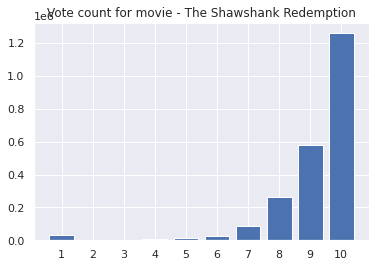

In [ ]:
plt.bar(*zip(*final[top5movies[0]].items()))
plt.title('Vote count for movie - ' + top5movies[0])
plt.show()

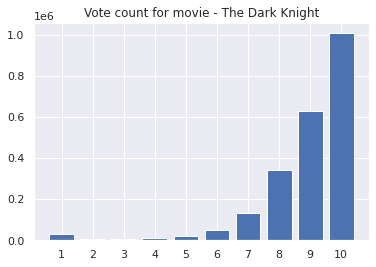

In [ ]:
plt.bar(*zip(*final[top5movies[1]].items()))
plt.title('Vote count for movie - ' + top5movies[1])
plt.show()

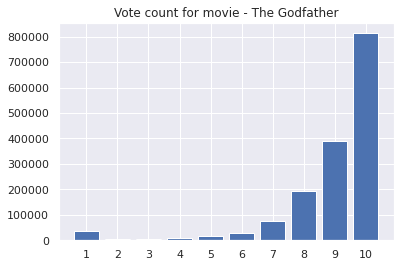

In [ ]:
plt.bar(*zip(*final[top5movies[2]].items()))
plt.title('Vote count for movie - ' + top5movies[2])
plt.show()

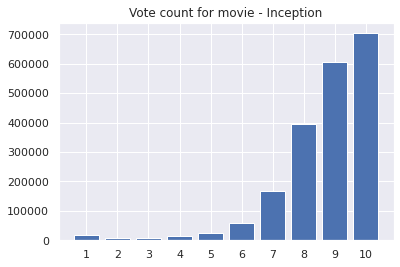

In [ ]:
plt.bar(*zip(*final[top5movies[3]].items()))
plt.title('Vote count for movie - ' + top5movies[3])
plt.show()

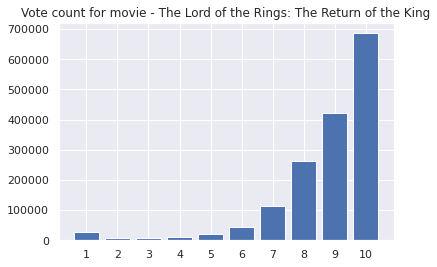

In [ ]:
plt.bar(*zip(*final[top5movies[4]].items()))
plt.title('Vote count for movie - ' + top5movies[4])
plt.show()

In [ ]:
#removal of all textual data and conversion into vectors:

from sklearn.feature_extraction.text import CountVectorizer

textual_columns=['genre','country','language','director','actors']
cvs=[]

for i in textual_columns:
  vectorizer = CountVectorizer()
  X = vectorizer.fit_transform(df_movies[i])
  cvs.append(X)

for i in range(len(textual_columns)):
  vari=textual_columns[i]+'_vector'
  df_movies[vari]=list(cvs[i])


df_movies=df_movies.drop(textual_columns,axis=1)
df_movies_without_names=df_movies.drop(['title','original_title'],axis=1)

In [ ]:
df_movies

,imdb_title_id,title,original_title,year,duration,avg_vote,votes,reviews_from_users,reviews_from_critics,genre_vector,country_vector,language_vector,director_vector,actors_vector
0,tt0000009,Miss Jerry,Miss Jerry,1894,45,5.9,154,1.0,2.0,"(0, 21)\t1","(0, 199)\t1","(0, 214)\t1","(0, 471)\t1\n (0, 2550)\t1","(0, 18955)\t1\n (0, 14422)\t1\n (0, 166857..."
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,70,6.1,589,7.0,7.0,"(0, 4)\t1\n (0, 6)\t1\n (0, 8)\t1","(0, 13)\t1","(0, 214)\t1","(0, 4014)\t1\n (0, 22269)\t1","(0, 46631)\t1\n (0, 151606)\t2\n (0, 75554..."
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,53,5.8,188,5.0,2.0,"(0, 8)\t1","(0, 71)\t1\n (0, 53)\t1","(0, 214)\t1","(0, 23455)\t1\n (0, 7556)\t1","(0, 9388)\t1\n (0, 113054)\t1\n (0, 160636..."
3,tt0002101,Cleopatra,Cleopatra,1912,100,5.2,446,25.0,3.0,"(0, 8)\t1\n (0, 13)\t1","(0, 199)\t1","(0, 62)\t1","(0, 4014)\t1\n (0, 7731)\t1","(0, 108607)\t5\n (0, 66248)\t1\n (0, 55573..."
4,tt0002130,L'Inferno,L'Inferno,1911,68,7.0,2237,31.0,14.0,"(0, 8)\t1\n (0, 2)\t1\n (0, 10)\t1","(0, 93)\t1","(0, 101)\t1","(0, 7305)\t1\n (0, 2281)\t1\n (0, 177)\t1\...","(0, 135519)\t1\n (0, 118957)\t1\n (0, 8649..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85842,tt9900060,Lupin III: La menzogna di Fujiko Mine,Lupin the IIIrd: Mine Fujiko no Uso,2019,58,6.9,103,1.0,1.0,"(0, 6)\t1\n (0, 2)\t1\n (0, 3)\t1","(0, 97)\t1","(0, 102)\t1","(0, 22303)\t1\n (0, 12053)\t1","(0, 65594)\t1\n (0, 47856)\t1\n (0, 64554)..."
85843,tt9900782,Kaithi,Kaithi,2019,145,8.5,8400,188.0,8.0,"(0, 0)\t1\n (0, 24)\t1","(0, 85)\t1","(0, 235)\t1","(0, 13436)\t1\n (0, 11228)\t1","(0, 56802)\t1\n (0, 3669)\t1\n (0, 81413)\..."
85846,tt9904802,Enemy Lines,Enemy Lines,2020,92,5.0,764,29.0,6.0,"(0, 26)\t1","(0, 194)\t1","(0, 62)\t1\n (0, 76)\t1\n (0, 197)\t1\n (...","(0, 767)\t1\n (0, 1712)\t1","(0, 75554)\t1\n (0, 98886)\t1\n (0, 156139..."
85849,tt9906644,Manoharam,Manoharam,2019,122,6.8,491,9.0,1.0,"(0, 8)\t1\n (0, 5)\t1","(0, 85)\t1","(0, 136)\t1","(0, 19630)\t1\n (0, 950)\t1","(0, 75902)\t2\n (0, 13859)\t1\n (0, 124688..."


In [ ]:
df_movies_without_names

,imdb_title_id,year,duration,avg_vote,votes,reviews_from_users,reviews_from_critics,genre_vector,country_vector,language_vector,director_vector,actors_vector
0,tt0000009,1894,45,5.9,154,1.0,2.0,"(0, 21)\t1","(0, 199)\t1","(0, 214)\t1","(0, 471)\t1\n (0, 2550)\t1","(0, 18955)\t1\n (0, 14422)\t1\n (0, 166857..."
1,tt0000574,1906,70,6.1,589,7.0,7.0,"(0, 4)\t1\n (0, 6)\t1\n (0, 8)\t1","(0, 13)\t1","(0, 214)\t1","(0, 4014)\t1\n (0, 22269)\t1","(0, 46631)\t1\n (0, 151606)\t2\n (0, 75554..."
2,tt0001892,1911,53,5.8,188,5.0,2.0,"(0, 8)\t1","(0, 71)\t1\n (0, 53)\t1","(0, 214)\t1","(0, 23455)\t1\n (0, 7556)\t1","(0, 9388)\t1\n (0, 113054)\t1\n (0, 160636..."
3,tt0002101,1912,100,5.2,446,25.0,3.0,"(0, 8)\t1\n (0, 13)\t1","(0, 199)\t1","(0, 62)\t1","(0, 4014)\t1\n (0, 7731)\t1","(0, 108607)\t5\n (0, 66248)\t1\n (0, 55573..."
4,tt0002130,1911,68,7.0,2237,31.0,14.0,"(0, 8)\t1\n (0, 2)\t1\n (0, 10)\t1","(0, 93)\t1","(0, 101)\t1","(0, 7305)\t1\n (0, 2281)\t1\n (0, 177)\t1\...","(0, 135519)\t1\n (0, 118957)\t1\n (0, 8649..."
...,...,...,...,...,...,...,...,...,...,...,...,...
85842,tt9900060,2019,58,6.9,103,1.0,1.0,"(0, 6)\t1\n (0, 2)\t1\n (0, 3)\t1","(0, 97)\t1","(0, 102)\t1","(0, 22303)\t1\n (0, 12053)\t1","(0, 65594)\t1\n (0, 47856)\t1\n (0, 64554)..."
85843,tt9900782,2019,145,8.5,8400,188.0,8.0,"(0, 0)\t1\n (0, 24)\t1","(0, 85)\t1","(0, 235)\t1","(0, 13436)\t1\n (0, 11228)\t1","(0, 56802)\t1\n (0, 3669)\t1\n (0, 81413)\..."
85846,tt9904802,2020,92,5.0,764,29.0,6.0,"(0, 26)\t1","(0, 194)\t1","(0, 62)\t1\n (0, 76)\t1\n (0, 197)\t1\n (...","(0, 767)\t1\n (0, 1712)\t1","(0, 75554)\t1\n (0, 98886)\t1\n (0, 156139..."
85849,tt9906644,2019,122,6.8,491,9.0,1.0,"(0, 8)\t1\n (0, 5)\t1","(0, 85)\t1","(0, 136)\t1","(0, 19630)\t1\n (0, 950)\t1","(0, 75902)\t2\n (0, 13859)\t1\n (0, 124688..."


In [ ]:
all_ids = set()
ids = []
for i in df_movies['imdb_title_id']:
  all_ids.add(i)
  ids.append(i)

id_to_index = {}
cnt = 0
for i in all_ids:
  id_to_index[i] = cnt
  cnt += 1

index_to_id = {}
for i in id_to_index:
  index_to_id[id_to_index[i]] = i

id_to_name = {}
ind = 0
for i in df_movies['original_title']:
  id_to_name[ids[ind]] = i
  ind+=1

name_to_id = {}
for i in id_to_name:
  name_to_id[id_to_name[i]] = i

In [ ]:
movies = []
rating = []

for i in df_movies['original_title']:
  movies.append(i)
for i in df_movies['avg_vote']:
  rating.append(i)

temp = []
for i in range(len(movies)):
  temp.append([rating[i],movies[i]])

temp.sort(); temp = temp[::-1]

top_3_movies = [] #name of top 3 movies
for i in range(3):
  top_3_movies.append(temp[i][1])

print('Top 3 movies based on the ratings are - ', ', '.join(top_3_movies))

Top 3 movies based on the ratings are -  Notuku Potu, Hopeful Notes, Jibon Theke Neya


In [ ]:
df_movies.head()

,imdb_title_id,title,original_title,year,duration,avg_vote,votes,reviews_from_users,reviews_from_critics,genre_vector,country_vector,language_vector,director_vector,actors_vector
0,tt0000009,Miss Jerry,Miss Jerry,1894,45,5.9,154,1.0,2.0,"(0, 21)\t1","(0, 199)\t1","(0, 214)\t1","(0, 471)\t1\n (0, 2550)\t1","(0, 18955)\t1\n (0, 14422)\t1\n (0, 166857..."
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,70,6.1,589,7.0,7.0,"(0, 4)\t1\n (0, 6)\t1\n (0, 8)\t1","(0, 13)\t1","(0, 214)\t1","(0, 4014)\t1\n (0, 22269)\t1","(0, 46631)\t1\n (0, 151606)\t2\n (0, 75554..."
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,53,5.8,188,5.0,2.0,"(0, 8)\t1","(0, 71)\t1\n (0, 53)\t1","(0, 214)\t1","(0, 23455)\t1\n (0, 7556)\t1","(0, 9388)\t1\n (0, 113054)\t1\n (0, 160636..."
3,tt0002101,Cleopatra,Cleopatra,1912,100,5.2,446,25.0,3.0,"(0, 8)\t1\n (0, 13)\t1","(0, 199)\t1","(0, 62)\t1","(0, 4014)\t1\n (0, 7731)\t1","(0, 108607)\t5\n (0, 66248)\t1\n (0, 55573..."
4,tt0002130,L'Inferno,L'Inferno,1911,68,7.0,2237,31.0,14.0,"(0, 8)\t1\n (0, 2)\t1\n (0, 10)\t1","(0, 93)\t1","(0, 101)\t1","(0, 7305)\t1\n (0, 2281)\t1\n (0, 177)\t1\...","(0, 135519)\t1\n (0, 118957)\t1\n (0, 8649..."


# Content Based Filtering

## Baseline model



In [ ]:
req_list = []

for i in range(len(df_movies)):
  temp = list(df_movies.iloc[i])
  new_temp = []

  for i in range(3,len(temp)-5):
    new_temp.append(temp[i])
  
  # for i in range(len(temp)-5, len(temp)):
  #   print(temp[i])
  #   for j in temp[i].toarray(): 
  #     new_temp.append(j)

  req_list.append(new_temp)


In [ ]:
def pearson_similarity():
  for i in range(len(top_3_movies)):
    print(top_3_movies[i])
    ind = 0
    for j in df_movies['original_title']:
      if(j == top_3_movies[i]): 
        break
      ind += 1

    val = []

    for ii in range(len(df_movies)):
      val.append((pearsonr(req_list[ind], req_list[ii])[0],ii))
    
    val.sort(); val = val[::-1]
    top_5_similar_movies = []

    for j in range(5):
      ind = val[j][1]
      top_5_similar_movies.append(id_to_name[df_movies.iloc[ind][0]])
    
    print('top 5 similar movies for ', top_3_movies[i], 'are - ')
    print('\n'.join(top_5_similar_movies[i] + 'pearsonr value = ' + str(val[i][0]) for i in range(5)))
    print('\n')

    
pearson_similarity()

Notuku Potu
top 5 similar movies for  Notuku Potu are - 
Notuku Potupearsonr value = 1.0
Alla älskar Alicepearsonr value = 0.9999954492433049
Il burberopearsonr value = 0.9999951928275973
God afton, Herr Wallenbergpearsonr value = 0.9999937410765766
Le battantpearsonr value = 0.9999931521555089


Hopeful Notes
top 5 similar movies for  Hopeful Notes are - 
Hopeful Notespearsonr value = 1.0
Machetepearsonr value = 0.9999990095796105
Y'en aura pas de facilepearsonr value = 0.9999985694655729
Riens du toutpearsonr value = 0.9999978875996978
La casa stregatapearsonr value = 0.9999970938295719


Jibon Theke Neya
top 5 similar movies for  Jibon Theke Neya are - 
Jibon Theke Neyapearsonr value = 0.9999999999999998
Utomlennye solntsem 2pearsonr value = 0.9999947153486807
Ramaleelapearsonr value = 0.9999915810761285
Govindudu Andari Vaadelepearsonr value = 0.9999877904309078
Punjab 1984pearsonr value = 0.9999866313746775


